# Model Building

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import math as mt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import pickle

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import statsmodels.api as sm

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [2]:
x = pd.read_csv('x.csv')
y = pd.read_csv('y.csv')

x

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
0,-1.827262,0.292351,0.103434,-0.616322,-0.296936,0.370842
1,-1.827262,0.292351,0.103434,-1.151850,-0.761597,-0.356934
2,-1.827262,0.292351,0.103434,1.793553,-0.296936,0.370842
3,-1.827262,0.292351,0.103434,1.793553,1.097047,0.370842
4,2.586867,1.211319,1.651862,0.722497,-0.296936,0.370842
...,...,...,...,...,...,...
99996,-1.091574,-0.626617,-1.444994,0.722497,-0.296936,0.370842
99997,-1.091574,-0.626617,-1.444994,-0.884086,-0.993928,0.370842
99998,-1.091574,-0.626617,-1.444994,-0.080794,-0.296936,0.370842
99999,-1.091574,-0.626617,-1.444994,-0.080794,-0.296936,0.370842


## K-fold Cross Validation

In [3]:
kf = KFold(n_splits=10)

mod = [KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), LinearRegression(), XGBRegressor(), Lasso(), Ridge(), ElasticNet()]

for i in range(len(mod)):
    kf_scores = cross_val_score(mod[i],x,y,cv=kf)
    print('Creating Model With ' + str(mod[i]))
    print('Testing Accuracy of are Model is : ' + str(kf_scores.mean()))
    print('Printing All Training Model Accuracy : \n' + str(kf_scores))
    print('\n')

Creating Model With KNeighborsRegressor()
Testing Accuracy of are Model is : 0.4942707202112576
Printing All Training Model Accuracy : 
[0.48724451 0.50940461 0.48818859 0.48409838 0.49466826 0.50807642
 0.49340346 0.49550139 0.47725223 0.50486934]


Creating Model With DecisionTreeRegressor()
Testing Accuracy of are Model is : 0.5134791822747116
Printing All Training Model Accuracy : 
[0.51871961 0.5230882  0.4974764  0.50522688 0.50682001 0.53899302
 0.51243755 0.51649262 0.48579698 0.52974056]


Creating Model With RandomForestRegressor()
Testing Accuracy of are Model is : 0.5870078738641195
Printing All Training Model Accuracy : 
[0.58335003 0.5992304  0.58003607 0.58297912 0.58438158 0.60425213
 0.5886181  0.59300315 0.55753911 0.59668904]


Creating Model With LinearRegression()
Testing Accuracy of are Model is : 0.10800770345258763
Printing All Training Model Accuracy : 
[0.10963711 0.1144566  0.12884678 0.09034653 0.10567045 0.11413705
 0.11403778 0.09950354 0.09484807 0.108593

## Splitting The Data Into Traning and Testing Dataset

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [5]:
x_train.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
84467,-1.091574,-0.626617,0.103434,-0.080794,-0.296936,0.370842
54294,-0.355886,-0.320294,0.103434,-0.080794,-0.296936,0.370842
3153,0.379803,0.598674,1.651862,0.722497,-0.296936,0.370842
24175,-1.091574,-0.626617,0.103434,-0.080794,-0.296936,0.370842
57509,-0.355886,-0.779778,0.877648,1.525789,1.561708,0.370842


In [6]:
x_test.head()

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2,Product_Category_3
90972,0.379803,1.364481,-0.670780,0.722497,-0.296936,0.370842
44635,-1.091574,-0.626617,1.651862,-0.080794,-0.296936,0.370842
16415,0.379803,0.139190,0.877648,-1.151850,-1.690920,-3.631925
1002,-0.355886,-1.239262,-0.670780,0.186970,0.864716,0.370842
74234,-0.355886,-1.239262,-0.670780,-1.151850,-1.690920,0.006954


In [7]:
y_train.head()

,Purchase
84467,5391
54294,5368
3153,9888
24175,5387
57509,4444


In [8]:
y_test.head()

,Purchase
90972,7819
44635,7192
16415,15308
1002,12662
74234,11538


## Preparing Model From The Dataset

### Picking Model Lowest Training And Testing Difference

In [9]:
def predict(model):
    print('Creating Model With ' + str(model))
    model.fit(x_train,y_train)
    train_pred = model.predict(x_train)
    print('Training Accuracy of are Model is : ' + str(round(r2_score(y_train, train_pred),2)) + '%')

    test_pred = model.predict(x_test)
    print('Testing Accuracy of are Model is : ' + str(round(r2_score(y_test, test_pred),2)) + '%')

    print('Mean Absolute Error of are Model is : ' + str(round(mean_absolute_error(y_test, test_pred), 4)))
    print('\n')

In [10]:
models = [ LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), XGBRegressor(), GradientBoostingRegressor(), Lasso(), Ridge(), ElasticNet()]

for i in range(len(models)):
    predict(models[i])

Creating Model With LinearRegression()
Training Accuracy of are Model is : 0.11%
Testing Accuracy of are Model is : 0.11%
Mean Absolute Error of are Model is : 3584.9499


Creating Model With KNeighborsRegressor()
Training Accuracy of are Model is : 0.63%
Testing Accuracy of are Model is : 0.49%
Mean Absolute Error of are Model is : 2590.319


Creating Model With DecisionTreeRegressor()
Training Accuracy of are Model is : 0.77%
Testing Accuracy of are Model is : 0.51%
Mean Absolute Error of are Model is : 2487.1009


Creating Model With RandomForestRegressor()
Training Accuracy of are Model is : 0.76%
Testing Accuracy of are Model is : 0.58%
Mean Absolute Error of are Model is : 2345.942


Creating Model With XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
       

### Performing Hyperparameter Tuning

#### Tuning Decision Tree Regressor

In [10]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'max_depth' : [1,2,3,4,5,6],
    'min_samples_split' : [4,6,8,10,12],
    'max_leaf_nodes' : [8,10,12,14,16,18],
    'min_samples_leaf' : [1,2,3,4,5]
}

In [12]:
grid = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions = params, n_jobs = -1)

grid.fit(x_train,y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error'],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'max_leaf_nodes': [8, 10, 12, 14, 16,
                                                           18],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [4, 6, 8, 10, 12]})

In [13]:
grid.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 8,
 'max_depth': 6,
 'criterion': 'friedman_mse'}

In [14]:
predict(DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 6, max_leaf_nodes = 8, min_samples_leaf = 5, min_samples_split = 12))

Creating Model With DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_leaf_nodes=8,
                      min_samples_leaf=5, min_samples_split=12)
Training Accuracy of are Model is : 0.57%
Testing Accuracy of are Model is : 0.56%
Mean Absolute Error of are Model is : 2524.7939




#### Tuning Gradient Boosting Regressor

In [11]:
params = {
    'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'criterion' : ['friedman_mse', 'squared_error'],
    'learning_rate' : [0.1,0.2,0.3,0.4,0.5],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'n_estimators' : [1,2,3,4,5]
    }

In [12]:
gb = GridSearchCV(GradientBoostingRegressor(),param_grid=params, n_jobs=-1)
gb.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 2, 3, 4, 5]})

In [15]:
gb.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.5,
 'loss': 'huber',
 'max_features': 'sqrt',
 'n_estimators': 5}

In [14]:
predict(GradientBoostingRegressor(criterion = 'squared_error', learning_rate = 0.5, loss = 'huber', max_features = 'sqrt', n_estimators = 5))

Creating Model With GradientBoostingRegressor(criterion='squared_error', learning_rate=0.5,
                          loss='huber', max_features='sqrt', n_estimators=5)
Training Accuracy of are Model is : 0.32%
Testing Accuracy of are Model is : 0.33%
Mean Absolute Error of are Model is : 2950.9838




#### Tuning Random Forest Regressor

In [16]:
params = {  'bootstrap': [True, False],
            'max_depth': [10, 20, 30, 40, 50],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'n_estimators': [200, 400, 600, 800, 1000]
    }

In [17]:
rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions = params, n_jobs = -1)

rf.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]})

In [18]:
rf.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

In [19]:
predict(RandomForestRegressor(n_estimators = 400, min_samples_split = 10, min_samples_leaf = 4, max_features = 'sqrt', max_depth = 40, bootstrap = True))

Creating Model With RandomForestRegressor(max_depth=40, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=400)
Training Accuracy of are Model is : 0.69%
Testing Accuracy of are Model is : 0.63%
Mean Absolute Error of are Model is : 2265.323




#### Tuning Logistic Regression With AdaBoost Regressor

In [20]:
predict(AdaBoostRegressor(LinearRegression()))

Creating Model With AdaBoostRegressor(estimator=LinearRegression())
Training Accuracy of are Model is : 0.08%
Testing Accuracy of are Model is : 0.08%
Mean Absolute Error of are Model is : 3853.7339




In [21]:
predict(BaggingRegressor(LinearRegression()))

Creating Model With BaggingRegressor(estimator=LinearRegression())
Training Accuracy of are Model is : 0.11%
Testing Accuracy of are Model is : 0.11%
Mean Absolute Error of are Model is : 3584.0262




#### Tuning KNeighborsRegressor

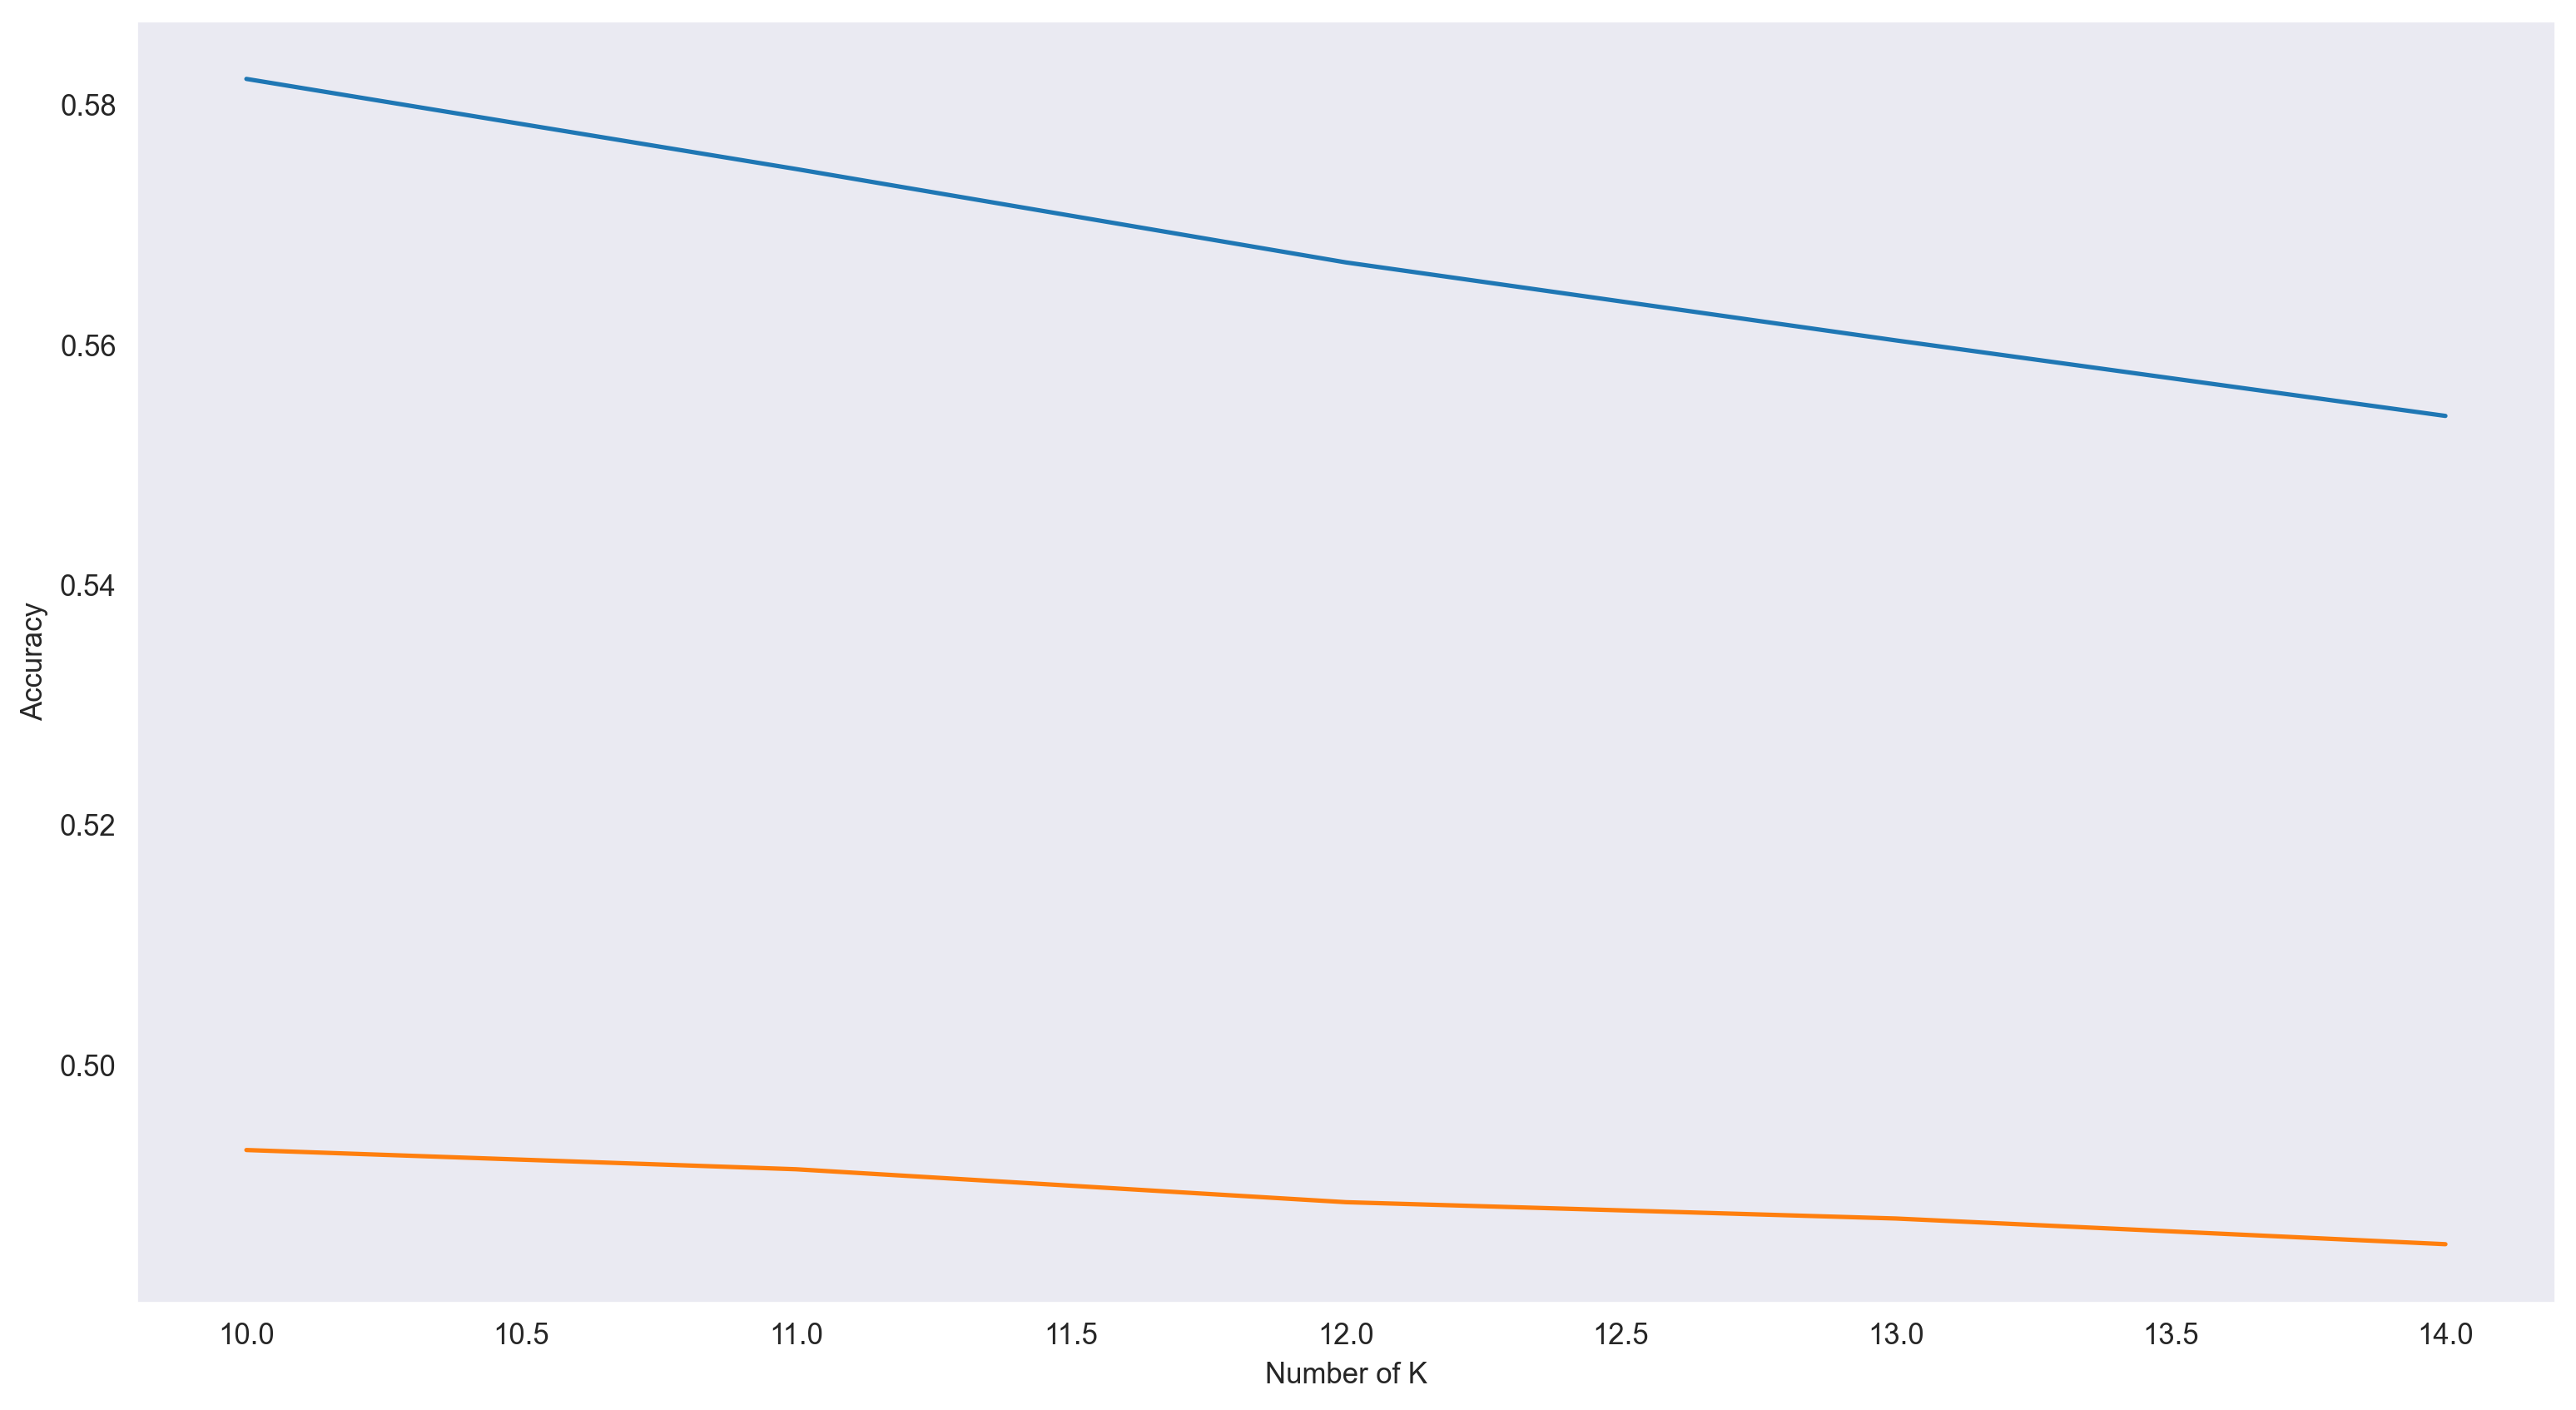

In [22]:
trainac = []
testac = []

for i in range(10,15):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    ypred = knn.predict(x_test)

    trainac.append(knn.score(x_train,y_train))
    testac.append(knn.score(x_test,y_test))

plt.title('')
plt.plot(range(10,15),trainac)
plt.plot(range(10,15), testac)
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()

In [23]:
predict(KNeighborsRegressor(n_neighbors = 13))

Creating Model With KNeighborsRegressor(n_neighbors=13)
Training Accuracy of are Model is : 0.56%
Testing Accuracy of are Model is : 0.49%
Mean Absolute Error of are Model is : 2612.2737




#### Tuning XGBoost Regressor

In [29]:
params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'max_depth': np.arange(3, 11, 1),
    'min_child_weight': np.arange(1, 6, 1),
    'colsample_bytree': np.arange(0.7, 1.01, 0.05),
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

In [30]:
xg = RandomizedSearchCV(XGBRegressor(), param_distributions = params, n_jobs = -1)

xg.fit(x_train,y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.5],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]),
                                        'min_child_weight': array([1, 2, 3, 4, 5]),
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [31]:
xg.best_params_

{'n_estimators': 200,
 'min_child_weight': 4,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8500000000000001}

In [32]:
predict(XGBRegressor(n_estimators = 200, min_child_weight = 4, max_depth = 7 , learning_rate = 0.1 , gamma = 0 , colsample_bytree = 0.8500000000000001))

Creating Model With XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8500000000000001, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)
Training Accuracy of are Model is : 0.68%
Testing Accuracy of are Model is : 0.64%
Mean Absolute Error of are Model is : 2215.3121




### Creating Final Model With Hyperparameter Value

In [15]:
final_model = XGBRegressor(n_estimators = 200, min_child_weight = 4, max_depth = 7 , learning_rate = 0.1 , 
                           gamma = 0 , colsample_bytree = 0.8500000000000001)

final_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8500000000000001, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

##### Comparing Training And Testing Accuracy

In [16]:
print('Training Accuracy of are Model is : ' + str(round(final_model.score(x_train,y_train),2))+' %')
print('Testing Accuracy of are Model is : ' + str(round(final_model.score(x_test, y_test),2))+' %')

Training Accuracy of are Model is : 0.68 %
Testing Accuracy of are Model is : 0.64 %


## Creating Model

In [ ]:
pickle.dump(final_model, open('model.pkl','wb'))